# Ego-Lane-fitting-Pointclouds
+ Detects ego lane lines from pointcloud data, focusing on the top view to fit a 3-degree polynomial for the left and right lane lines. 
+ The algorithm's output must be the polynomial coefficients for each lane line, formatted similarly to the provided sample output.

### Data Handling
+ `Pointcloud Data`: 
    * work with binary files containing pointcloud data. 
    * Each point:  x, y, z, intensity, lidar beam values. 
    * The intensity and lidar beam values are crucial for distinguishing lane points.
+ `Visualization`: The task provides a `data_visualize.py` script for visualizing pointcloud data, which can be a valuable tool for debugging and validating your algorithm's output.

### Approach and Methodology
Given a small dataset, traditional machine learning and geometric algorithms are more suitable for processing LiDAR pointcloud data for tasks such as ego lane detection. 
+ `Preprocessing`: 
    * Clean and filter the pointcloud data, focusing on points likely to represent lane markings based on intensity and possibly z values.
+ `Lane Point Identification`: 
    * Use intensity and other heuristics to distinguish between lane and non-lane points. 
        * reflective scatter intensity and frequency of the lane is generally larger and higher than non-lane points (white/yellow for lane)
        * threshold values obtain by exploiting clustering techniques to identify points belonging to lane markings accurately.
+ `Lane Line Fitting`: Once you have identified lane points, 
    * fit a 3-degree polynomial to these points for both the left and right lanes. 
    * use curve fitting techniques or optimization algorithms to find the best fit.

### Development
+ `Libraries`: 
    * Open3D or Matplotlib for visualization.
    * SciPy for fitting polynomials.
+ `Algorithm Implementation`: Develop your algorithm step by step, starting with 
    * data loading
    * data preprocessing
        * `Voxel Grid Downsampling`: Reduces the density of the pointcloud by averaging points within each voxel, which can help speed up computations without losing significant detail.
        * `Vertex normal estimation`: When the pointcloud will be used for surface reconstruction, rendering, or advanced analysis tasks
            1. `Surface Reconstruction and Meshing`
            For reconstructing surfaces from pointclouds, knowing the normals at each point is crucial. Normals indicate the orientation of the surface at each point, which helps algorithms like Poisson reconstruction or Greedy Triangulation to accurately generate meshes from the pointcloud data.
            Normals are used to determine the "inside" and "outside" of a surface, which is essential for creating solid objects from pointclouds.
            2. `Rendering and Visualization`
            When visualizing pointclouds, especially in 3D rendering software, normals are used to apply lighting and shading effects correctly. Normals help in determining how light reflects off surfaces, which enhances the visual perception of depth and material properties in the rendered scene.
            3. `Feature Extraction and Object Recognition`
            In some advanced analysis tasks, such as identifying specific objects or features within a pointcloud, normals can provide additional geometric information that complements the raw position data. For example, the orientation of surface elements can help differentiate between vertical walls and horizontal roads.
            4. `Improving Registration Accuracy`
            For pointcloud registration tasks (aligning two pointclouds), normals can improve the accuracy of algorithms like Iterative Closest Point (ICP). By considering both the position and orientation of points, these algorithms can achieve more precise alignments, especially in scenes with complex geometries.
            5. `Robustness to Noise and Downsampling`
            Estimating normals after downsampling can help mitigate the effects of noise in the original pointcloud. By working with a reduced set of points, the normal estimation process can focus on the underlying surface's main features, potentially leading to more accurate and stable normals.
    * feature extraction and filtering
        * `DBSCAN`: After filtering, clustering can help group the remaining points into distinct lane markings based on proximity.
        * `Intensity-based Filtering`: Since lane markings often have higher reflectivity than the road surface, intensity values can be used to filter points likely to represent lane markings.
    * lane point identification
        * `Ground Segmentation (optional)`: Separate the ground plane from other objects using geometric methods like RANSAC or a simple plane fitting algorithm, which is essential for focusing on lane markings.

    * polynomial fitting
        * `Polynomial Curve Fitting`: Once lane markings are identified, use methods like least squares to fit a polynomial curve to each detected lane marking. This step directly corresponds to the requirement of modeling lane lines with a 3-degree polynomial.
        * `Iterative Closest Point (ICP) for Refinement`: In scenarios where prior lane models exist (e.g., from previous frames in a video), ICP can be used to refine the lane line fit by minimizing the distance between the new data points and the model.
    * post-processing
        * `Smoothing Filters`: Apply smoothing techniques to the polynomial coefficients to ensure lane lines are not overly sensitive to noise or outliers in the data. Techniques like moving averages or Savitzky-Golay filters can be effective.
    * evlautation and validation
        * `Manual Inspection`: Use visualization tools to manually inspect the fitted lane lines against the pointcloud data to ensure they accurately represent the ego lanes
        * `Cross-validation`: If some labeled data is available, cross-validation techniques can be used to evaluate the robustness of your algorithm and optimize parameters.

### Testing and Validation
+ `Validation`: Use the provided sample_output to validate your algorithm's performance. Ensure your output format matches the expected format exactly.
+ `Debugging and Optimization`: Use visualization tools to check the accuracy of lane detection and adjust your algorithm as necessary. Performance and accuracy are key.

## Algorithms
### Geometric and Heuristic Methods
+ `RANSAC (Random Sample Consensus)`: Used for plane fitting and outlier removal. It's effective for identifying ground planes and other large flat surfaces by iteratively selecting a subset of points, fitting a model (e.g., a plane), and then measuring the model's validity against the entire dataset.
+ `DBSCAN (Density-Based Spatial Clustering of Applications with Noise)`: A clustering algorithm that groups points closely packed together and marks points in low-density regions as outliers. It’s useful for segmenting objects from the background or separating different objects in a pointcloud.
+ `Hough Transform`: Often used in image processing for line detection, it can also be applied to pointcloud data for detecting lane lines or other linear features by transforming points into a parameter space and detecting collinear points.
+ `Euclidean Clustering`: A simple method to segment pointclouds into individual objects based on the Euclidean distance between points. It's effective for object detection when objects are well-separated in space.
### Machine Learning and Deep Learning Methods (Not Suitable)
+ `PointNet and Variants (PointNet++, DGCNN, etc.)`: Neural networks designed specifically for processing pointcloud data. They can classify, segment, and extract features from pointclouds directly, handling the data's unordered nature.
+ `Convolutional Neural Networks (CNNs)`: While traditionally used for image data, CNNs can be applied to pointclouds that have been projected onto a 2D plane (e.g., bird’s-eye view) or converted into voxel grids or range images.
+ `Graph Neural Networks (GNNs)`: Used for pointclouds modeled as graphs, where points are nodes and edges represent spatial or feature relationships. GNNs can capture complex patterns in the data for tasks like segmentation and object classification.
+ `YOLO (You Only Look Once) for 3D`: Adaptations of popular real-time object detection systems to work with 3D data. For instance, projecting pointclouds into 2D spaces and then applying these algorithms to detect objects or features like lane lines.

### Feature Extraction and Filtering Techniques
+ `PCA (Principal Component Analysis)`: Used for dimensionality reduction and feature extraction. It can help identify the main directions of variance in the data, useful for tasks like ground plane removal or object orientation estimation.
+ `Voxel Grid Filtering`: Reduces the resolution of pointcloud data by averaging points within voxel grids. It's a common preprocessing step to reduce computational load while preserving the overall structure of the scene.
+ `Statistical Outlier Removal`:` Identifies and removes outliers based on the distribution of point-to-point distances, helping clean the data before further processing.

### Curve Fitting and Optimization
+ `Polynomial Curve Fitting`: Employed for lane detection, as mentioned in your task, where polynomial functions are fitted to data points representing lane markings.
+ `Iterative Closest Point (ICP)`: An algorithm for aligning two pointclouds or a pointcloud and a model. It's used in tasks like SLAM (Simultaneous Localization and Mapping) for map building and localization.

In [1]:
# data loading
import pandas as pd
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# data preprocessing
import open3d as o3d
import os
import itertools
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from numpy.polynomial.polynomial import Polynomial
from sklearn.linear_model import RANSACRegressor
from scipy.spatial import distance
from scipy.optimize import fsolve
from scipy.signal import find_peaks
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error




In [2]:

def load_pointclouds_with_attributes(folder_path):
    """
    Loads a pointcloud from a binary file and parses it into a numpy array for further processing.
    Given that open3D offers efficient pointcloud processing, we will use it to load the pointclouds.
    Open3D to load and process pointcloud data, the primary focus is on spatial information (i.e., the x, y, z coordinates of each point). 
    By default, Open3D's PointCloud object does not directly handle non-spatial attributes.
    Hence, relavant non-spatial attributes critical to ego lane detection can be managed alongside Open3D pointcloud objects.
    Here, we returns a list of tuples containing Open3D pointcloud objects and corresponding attributes.
    
    PointCloud point and Attributes
    ----------
    1. scene: scene id - to be added to the point cloud
    2. x: x coordinate of the point
    3. y: y coordinate of the point
    4. z: z coordinate of the point
    5. intensity: intensity of the point
    6. lidar_beam: lidar beam id
    ----------
    """
    pointclouds_with_attributes = []
    # get a list of all point cloud files in the directory
    file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.bin')]
    # load each point cloud from the folder and assign a scene id to it using zip or enumerate
    for scene_id, file_path in enumerate(file_paths):
        # Load the binary pointcloud data as a NumPy array
        points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 5)
        
        # Create an Open3D PointCloud object for spatial data (X, Y, Z)
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(points[:, :3])

        # add the scene id to the point cloud
        attributes = np.c_[np.ones([points.shape[0], 1], dtype=np.int32) * scene_id, points[:, 3:]]
        
        # Add the tuple (Open3D pointcloud, attributes array) to the list
        pointclouds_with_attributes.append((pcd, attributes))
     
    
    return pointclouds_with_attributes

## Data Preprocessing
### Voxel downsampling
Voxel downsampling uses a regular voxel grid to create a uniformly downsampled point cloud from an input point cloud. It is often used as a pre-processing step for many point cloud processing tasks. The algorithm operates in two steps:
1. Points are bucketed into voxels.
2. Each occupied voxel generates exactly one point by averaging all points inside.
<br>
(source: open3D)
<br>

In [3]:
#  preprocess the point cloud data: downsample the point cloud
def downsample_pointcloud(pcd, voxel_size=0.05):
    """
    Downsamples the pointcloud using a voxel grid filter.
    The algorithm operates in two steps:
    1. Points are bucketed into voxels.
    2. Each occupied voxel generates exactly one point by averaging all points inside.
    """
    return pcd.voxel_down_sample(voxel_size=voxel_size)


### Vertex normal estimation
Another basic operation for point cloud is point normal estimation. 
1. A normal at a point on a surface is a vector that is perpendicular (orthogonal) to the tangent plane at that point.
2. Normals indicate the orientation of the surface at each point, which helps algorithms like Poisson reconstruction or Greedy Triangulation to accurately generate meshes from the pointcloud data.
<br>
(source: open3D)
<br>

#### Note
In the context of ego lane detection, while normal estimation might not be directly necessary for identifying lane markings, understanding the procedure and its applications is valuable for broader pointcloud processing tasks and when considering the integration of pointcloud data into more complex scene analysis and reconstruction workflows.

In [4]:
def compute_normals(downpcd, radius=0.1, max_nn=30):
    """
    Computes the normals of a downsampled point cloud.
    
    Parameters:
    - downpcd: The downsampled Open3D point cloud object.
    - radius: Search radius for normal computation.
    - max_nn: Maximum number of nearest neighbors to use.
    
    Returns:
    - The Open3D point cloud object with normals computed.
    """
    downpcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=radius, max_nn=max_nn))
    return downpcd


### Z Filtering
Filter the scatters that is higher than ground and lanes by computing the mean and standard deviation of z

In [5]:
def z_filter(pointcloud):
    """
    Filters a point cloud based on z-axis values to remove points that are significantly higher than the ground.
    
    Parameters:
    - pointcloud: The Open3D point cloud object.
    
    Returns:
    - Indices of points within the desired z-axis range.
    """
    z_values = np.asarray(pointcloud.points)[:, 2]
    z_threshold = np.mean(z_values) + 2 * np.std(z_values)
    selected_indices = np.where(z_values < z_threshold)[0]
    return selected_indices


### Intensity-based Filtering Functions
Selecting points from the pointcloud based on their intensity values, isolating potential lane markings, which typically have higher reflectivity
1. apply `DBSCAN clustering` to group local point cloud clusters together to enable lanes intensity threshold learning
2. Correlate the DBSCAN labels with the intensity values stored in the attributes array.
3. For each cluster, based on the DBSCAN result, for each point cloud
    * Intensity Threshold Learning: Determine the intensity threshold based on the intensity of each cluster
4. Filter Clusters Based on Intensity 

In [6]:
def cluster_with_dbscan_open3d(pcd, eps=0.08, min_samples=10):
    """
    Applies DBSCAN clustering to a point cloud to identify clusters based on spatial proximity.
    
    Parameters:
    - pcd: The Open3D point cloud object to cluster.
    - eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    - min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
    
    Returns:
    - labels: An array of cluster labels for each point in the point cloud.
    """
    labels = np.array(pcd.cluster_dbscan(eps=eps, min_points=min_samples, print_progress=False))
    max_label = labels.max()
    print(f"Point cloud has {max_label + 1} clusters")
    return labels


#### DBSCAN Clustering Functions
* clustering
* tuning eps and min_samples hyperparas: approached through grid search, random search, or more sophisticated optimization techniques, but it often involves a trade-off between computational cost and the quality of the resulting clusters.

In [7]:
# function for clustering and evaluating the clustering results
def evaluate_clustering(example_pcd, eps, min_samples):
    labels = np.array(example_pcd.cluster_dbscan(eps=eps, min_points=min_samples, print_progress=False))
    max_label = labels.max()
    num_clusters = max_label + 1
    noise_ratio = np.sum(labels == -1) / len(labels)
    
    return num_clusters, noise_ratio

#  clustering scoring function
def score_clustering(num_clusters, noise_ratio, optimal_clusters=32, noise_penalty=100):
    """
    Scores the clustering outcome based on the number of clusters, noise ratio, and predefined targets.
    
    Parameters:
    - num_clusters: The number of clusters detected.
    - noise_ratio: The ratio of points classified as noise.
    - optimal_clusters: The target number of clusters for optimal scoring. (ground, lanes, crosswalks, trees, curb, vehicles, signs, barriers, trees, housing, beings.)
    - noise_penalty: The weight of the noise ratio in the score calculation.
    
    Returns:
    - score: A calculated score of the clustering outcome.
    """
    # Reward configurations that are close to the optimal number of clusters
    cluster_score = -abs(num_clusters - optimal_clusters)
    
    # Penalize configurations with a high noise ratio
    noise_score = -noise_ratio * noise_penalty
    
    # Calculate total score
    score = cluster_score + noise_score
    return score





In [8]:
def perform_dbscan_and_update_attributes(pcd_with_attributes, eps, min_samples):
    """
    Performs DBSCAN clustering on the pointcloud and updates attributes with cluster labels.
    
    Parameters:
    - pcd_with_attributes: Tuple of (Open3D pointcloud, attributes array).
    - eps: The DBSCAN eps parameter.
    - min_samples: The DBSCAN min_samples parameter.
    
    Returns:
    - Updated tuple of (Open3D pointcloud, updated attributes array with DBSCAN labels).
    """
    # Select a single pointcloud example for hyperparameter tuning
    pcd, attributes = pcd_with_attributes
    # Applying DBSCAN clustering with the best parameters: best_params['eps'] and best_params['min_samples']
    best_labels = cluster_with_dbscan_open3d(pcd, eps, min_samples)
    updated_attributes = np.hstack((attributes, best_labels.reshape(-1, 1)))  # Append labels as a new column
    return (pcd, updated_attributes)


### Intensity Threshold

In [9]:
def learn_intensity_threshold_from_clusters(attributes, percentage=0.10):
    """
    Learns an intensity threshold based on the analysis of clusters.
    Parameters:
    - attributes: A NumPy array containing DBSCAN labels and intensities.
    Returns:
    - An intensity threshold learned from the cluster analysis.
    """
    # Assuming DBSCAN labels are the last column, and intensity is the second column
    cluster_labels = attributes[:, -1].astype(int)
    intensities = attributes[:, 1]
    
    # Initialize variables to store sum of intensities and count for each cluster
    cluster_intensity_sum = {}
    cluster_point_count = {}
    
    # Calculate sum of intensities and point count for each cluster
    for label, intensity in zip(cluster_labels, intensities):
        if label not in cluster_intensity_sum:
            cluster_intensity_sum[label] = 0
            cluster_point_count[label] = 0
        cluster_intensity_sum[label] += intensity
        cluster_point_count[label] += 1
    
    # Calculate average intensity and std for each cluster
    mean_intensity = {label: cluster_intensity_sum[label] / cluster_point_count[label]
                         for label in cluster_intensity_sum}
    
    # # Determine threshold as the average of top N highest average intensities
    N = max(1, int(round(len(mean_intensity) * percentage)))  # Use top 75% of clusters and cast to int
    top_average_intensities = sorted(mean_intensity.values(), reverse=True)[:N]
    threshold = sum(top_average_intensities) / N
    
    return threshold

In [10]:
def filter_clusters_based_on_intensity(attributes, intensity_threshold):
    """
    Filters clusters based on intensity and normals analysis.
    Parameters:
    - pcd: An Open3D pointcloud object with normals computed.
    - attributes: A NumPy array with DBSCAN labels and intensities.
    - intensity_threshold: Threshold for filtering based on intensity.
    Returns:
    - A list of indices for points considered as part of lanes.
    """
    
    cluster_labels = attributes[:, -1].astype(int)
    intensities = attributes[:, 1]
    
    selected_indices = []
    for i, (label, intensity) in enumerate(zip(cluster_labels, intensities)):
        if label >= 0 and intensity > intensity_threshold:
            selected_indices.append(i)
    
    return selected_indices

### Ground Plane Segmentation
simplify further analysis like lane marking detection by reducing the data's complexity. One common approach for ground segmentation is to use the Random Sample Consensus (RANSAC) algorithm
+  `distance_threshold`: 
    * defines the maximum distance a point can have to an estimated plane to be considered an inlier 
+ `ransac_n`:
    * defines the number of points that are randomly sampled to estimate a plane
+ `num_iterations`: 
    * defines how often a random plane is sampled and verified. 
The function then returns the plane as (a,b,c,d) such that for each point (x,y,z) on the plane we have ax +by + cz + d = 0. The function further returns a list of indices of the inlier points.

In [11]:
def segment_ground_plane(pcd, attributes, distance_threshold=0.01, ransac_n=3, num_iterations=1000):
    """
    Segments the ground plane from an input point cloud using the RANSAC algorithm.

    Parameters:
    - pcd: Open3D point cloud object from which the ground plane is to be segmented.
    - distance_threshold: Maximum distance a point can be from the plane model to be considered as an inlier.
    - ransac_n: Number of points to sample for generating the plane model in each iteration.
    - num_iterations: Number of iterations RANSAC will run to maximize inliers.

    Returns:
    - ground_pcd: The segmented ground plane as an Open3D point cloud.
    - non_ground_pcd: All points that are not part of the ground plane as an Open3D point cloud.
    """
    # Perform plane segmentation to separate ground
    plane_model, inliers = pcd.segment_plane(distance_threshold=distance_threshold,
                                             ransac_n=ransac_n,
                                             num_iterations=num_iterations)
    [a, b, c, d] = plane_model

    # Extract inliers and outliers
    inlier_cloud = pcd.select_by_index(inliers)
    outlier_cloud = pcd.select_by_index(inliers, invert=True)
    # create a list with zeros with length equal to the number of points in the point cloud
    inniers_bool = np.zeros(len(pcd.points), dtype=bool)
    inniers_bool[inliers] = True
    
    # Extract the inline points from the attributes and outliers from the attributes
    inlier_attributes = attributes[inliers]
    outlier_attributes = attributes[~inniers_bool]
    
    # Optional: Assign a unique color to ground and non-ground points for visualization
    inlier_cloud.paint_uniform_color([0.0, 1.0, 0.0])  # Green for ground
    outlier_cloud.paint_uniform_color([1.0, 0.0, 0.0])  # Red for non-ground

    return inlier_cloud, outlier_cloud, inlier_attributes, outlier_attributes


## 3D Point Cloud Visualizatoin

In [12]:
def visualize_lane_detection(original_pcd, filtered_pcd):
    """
    Visualizes the original point cloud and the filtered point cloud representing detected lanes.
    
    Parameters:
    - original_pcd: The original Open3D point cloud object.
    - filtered_pcd: The filtered Open3D point cloud object representing detected lanes.
    """
    # Set the color of the original point cloud to gray
    colors = np.asarray(original_pcd.colors)
    gray_color = np.array([[0.5, 0.5, 0.5]])  # Gray color
    if len(colors) == 0:  # If original point cloud has no colors
        colors = np.tile(gray_color, (np.asarray(original_pcd.points).shape[0], 1))
    else:
        colors *= 0.5  # Darken the original colors to distinguish from filtered points
    original_pcd.colors = o3d.utility.Vector3dVector(colors)
    
    # Set the color of the filtered point cloud to yellow for high visibility
    lane_color = np.array([[1, 0.75, 0.8]])  # Pink color
    num_filtered_points = np.asarray(filtered_pcd.points).shape[0]
    filtered_colors = np.tile(lane_color, (num_filtered_points, 1))
    filtered_pcd.colors = o3d.utility.Vector3dVector(filtered_colors)
    
    # Combine the original and filtered point clouds for visualization
    combined_pcd = original_pcd + filtered_pcd
    
    # Visualize the combined point cloud
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Before-Intensity-Filter Visualization")
    vis.add_geometry(combined_pcd)
    vis.run()
    vis.destroy_window()
  
    # Visualize only the filtered point cloud for better visibility
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="After-Intensity-Filter Visualization")
    vis.add_geometry(combined_pcd)
    vis.add_geometry(filtered_pcd)
    vis.run()
    vis.remove_geometry(combined_pcd, False)
    vis.poll_events()
    vis.update_renderer()
    vis.close()
    vis.destroy_window()
    
    

## Lane Detection
- `Line Clustering`
    * Polyline fitting requires lane clustering
    * K-means clustering based on euclidean distance is applied to cluster lanes and crosswalks.
    * the optimal k-mean cluster is determines based on the result of silhouette score nd visualized multiple cluster per k-mean value.
    * the clustering visulization will utilize matlibplot scatter plot
- `Lanes Detection`
    * detect numner of lanes based on number of peak intensity in the range of y
- `Line Fitting`
    * For each cluster that potentially represents a lane, perform a polynomial fit. You can use np.polyfit with a degree of 2 or 3 (for a quadratic or cubic fit), which is common for lane fitting.
- `Cost Function`
    * To refine the fits or to choose between multiple candidate fits, define a cost function that penalizes fits which deviate significantly from what a typical lane would look like. This can include factors such as lane width, parallelism with other lanes, and orientation relative to the driving direction.

### Line Clustering: K-Means Clustering
* `Scaler Transform`: standardize the data by transforming based on standardscaler


In [13]:
def scaler_transform(pointcloud):
    '''
    Transform the data by calculating the z-score of each value in the sample,
    This is done by taking the feature x,y,z, subtract the mean of the feature and then divide by the standard deviation of the feature.
    This process can be inflence by outliers, hence noise should be removed before scaling.
    - pointcloud: Open3D pointcloud objects
    
    Returns:
    - pointcloud_T: A new Open3D pointcloud objects with transformed coordinates that has the same shape as the original pointcloud.
    '''
    scaler = StandardScaler()
    # Extract the coordinates from the point cloud 
    coordinates = np.asarray(pointcloud.points)
    # fit the scaler to the data, transform the data
    xyz_T = scaler.fit_transform(coordinates)
    # create a point cloud with the transformed coordinates
    pointcloud_T = o3d.geometry.PointCloud()
    pointcloud_T.points = o3d.utility.Vector3dVector(xyz_T)
    return pointcloud_T


#### Optimize K Means:  Elbow or Silhouette?
* `Elbow Method`:
    * Principle: The elbow method looks at the percentage of variance explained as a function of the number of clusters. You plot the number of clusters against the within-cluster sum of squares (WCSS), looking for an "elbow" where the rate of decrease sharply changes. This point is considered to be indicative of the appropriate number of clusters.
    * Suitability for Elongated Features: The elbow method can sometimes struggle with identifying the correct number of clusters for data with elongated features because it relies on variance, which might not decrease significantly after a certain point if the clusters are elongated and dispersed.
    * Use Case: It's more suitable when the clusters have a roughly spherical shape rather than elongated features. However, it can still provide a good initial estimate or insight into the clustering tendency of the dataset.
* `Silhouette Method`:
    * Principle: The silhouette method measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
    * Suitability for Elongated Features: The silhouette method can be more effective for evaluating the quality of clustering when dealing with elongated features. This is because it considers both cohesion (how close objects are to other objects in their cluster) and separation (how distinct a cluster is from other clusters), rather than just the variance within clusters.
    * Use Case: It's especially useful when the data contains complex structures or when the clusters are not spherical. The silhouette score provides a more nuanced view of cluster quality and separation, making it a better choice for assessing the appropriateness of the number of clusters in cases with elongated features.

In [14]:
def optimize_k_means(pointcloud_T, max_n_clusters = 12, visualize=False):
    """
    Calculate silhouette score for a cluster of points to find the optimal number of clusters.
    - pointcloud_T: scaler transformed Open3D pointcloud objects
    - range_n_clusters: maximum integers representing the max range of clusters to consider.
    - visualize: A boolean indicating whether to visualize the the cluster result or not.
    
    Returns:
    - num_cluster: The optimal number of clusters
    """
    # extract the x and y coordinates
    xy_T = np.asarray(pointcloud_T.points)[:, :2]
    
    silhouette_score_buffer = []
    # distortions = []
    
    if visualize:
        df = pd.DataFrame(xy_T, columns=['x', 'y'])

    min_n_cluster = 2
    for k in range(min_n_cluster, max_n_clusters):
        
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        # take the nearest 2D points of max distance of 0.05 meters
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10, max_iter=300)
        cluster_labels = kmeans.fit_predict(xy_T)
        
        #  check also dbscan
        db = DBSCAN(eps=(k*(0.01)), min_samples= 10).fit(xy_T)
        labels = db.labels_
        
        # new columns for each kmeans cluster label in cluster_labels
        df[f'KMeans_{k}'] = cluster_labels
        df[f'DBSCAN_{k}'] = labels
        
        # calculate the silhouette score
        silhouette_avg = silhouette_score(xy_T, cluster_labels)
        
        silhouette_score_buffer.append(silhouette_avg)
        
        # calculatee the elbow method to find the optimal number of clusters
        # elbow method to find the optimal number of clusters
        # distortions.append(kmeans.inertia_)
        
    if visualize: 
        # plot the clusters
        fig, axs = plt.subplots(1, len(df.columns)-2, figsize=(40, 5))
        for i, ax in enumerate(fig.axes, start=2):
            ax.scatter(df['x'], df['y'], c=df.iloc[:, i], cmap='viridis')
            # set titile same as the column name
            ax.set_title(df.columns[i])
        plt.show()
        
    # choose the number of clusters with the highest silhouette score
    num_cluster = np.argmax(silhouette_score_buffer) + min_n_cluster
    
    # # Use the 'kneed' library to identify the elbow point automatically
    # kn = KneeLocator(range(min_n_cluster, max_n_clusters), distortions, curve='convex', direction='decreasing')
    # num_cluster = kn.knee
    
    return num_cluster

## Lane Detection

In [15]:

#  find the number of lanes based on the number of intensity peaks from range min y to max y
def find_number_of_lanes(pointcloud, attributes, percentile=90, min_num_peaks=2):
    """
    Find the number of lanes based on the number of intensity peaks.
    - pointcloud: np.array of the point cloud
    - attributes: The attributes that contains intensities values of the point cloud at index 1
    - min_num_peaks: The number of peaks to detect.
    - percentage: The percentage of the intensity to consider as the threshold.
    Returns:
    - num_lanes: The number of lanes detected based on intensity peaks.
    """
    # Extract the y-coordinates and intensities
    y = pointcloud[:, 1]
    intensities = attributes[:, 1]
    
    min_y, max_y = np.min(y), np.max(y)
    
    # pick the y bins that has the maximum intensity
    lane_width = 3.75
    max_num_lanes = 6
    max_two_way_width = lane_width * max_num_lanes * 2
    # define number of y bins based on the maximum two way width
    y_bins = np.linspace(min_y, max_y, int(max_two_way_width))
    intensity_histogram, _ = np.histogram(y, bins=y_bins, weights=intensities)
    
    # find the peaks in the intensity histogram that are larger than the threshold
    peaks_bin, _ = find_peaks(intensity_histogram, height=0)
    num_lanes = max(min_num_peaks, len(peaks_bin))
    # convert back the y with peak intensity to the original scale
    y_peak_coordinates = y_bins[peaks_bin]
    print(f"Number of lanes detected: {num_lanes} at y-coordinates: {y_peak_coordinates}")
    # plot the intensity histogram with the peaks
    plt.plot(y_bins[1:], intensity_histogram)
    plt.plot(y_bins[peaks_bin], intensity_histogram[peaks_bin], "x")
    plt.xlabel('y-coordinate')
    plt.ylabel('intensity')
    plt.show()
    
    
    return num_lanes, y_peak_coordinates

     

In [16]:
def calculate_slope(point1, point2):
    """
    Calculate the slope between two points.
    """
    if (point2[0] - point1[0]) == 0:  # Avoid division by zero
        return np.inf
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

In [17]:
def segregate_points_based_on_lanes(filtered_points, filtered_attributes, y_peak_coordinates, threshold_intensity, num_bins=100):
    """
    Improved segregation of points based on lanes by analyzing each X-coordinate bin for lane detection
    based on Y-coordinates and intensity.

    Parameters:
    - filtered_points: open3D pointcloud object
    - filtered_attributes: attributes corresponding to filtered_points, including intensity.
    - y_peak_coordinates: Y-coordinates representing the peak locations of lanes.
    - threshold_intensity: Intensity threshold to consider a point as part of a lane.
    - num_bins: Number of bins to divide the X-coordinate range into.

    Returns:
    - lane_groups: A dictionary where keys are tuples (bin_index, lane_index) and values are numpy arrays of points assigned to a lane.
    """
    # Initialize the result dictionary
    lane_groups = {}
    # to np.array
    filtered_points_array = np.asarray(filtered_points.points)
    filtered_attributes_array = np.asarray(filtered_attributes)
    # Extract X, Y coordinates and intensity from filtered points and attributes
    X, Y = filtered_points_array[:, 0], filtered_points_array[:, 1]
    intensity_array = filtered_attributes_array[:, 1]  # Assuming intensity is at index 1

    # Define bins for X-coordinate
    x_min, x_max = np.min(X), np.max(X)
    bins = np.linspace(x_min, x_max, num_bins + 1)

    # Bin points based on X-coordinate
    bin_indices = np.digitize(X, bins) - 1  # Adjusting indices to be 0-based

    # Analyze points in each bin
    for bin_index in range(num_bins):
        # Select points and attributes in current bin
        in_bin_mask = bin_indices == bin_index
        points_in_bin = filtered_points_array[in_bin_mask]
        intensity_in_bin = intensity_array[in_bin_mask]
        
        lane_width = 4  # Assuming a constant lane width
        # Skip empty bins
        if points_in_bin.size == 0:
            continue
        
        # in the y_peak_coordinates, if two peaks are at proximity of each other, then they are the same lane, combine them by calculating the average
        y_peak_coordinates = np.sort(np.array(y_peak_coordinates))
        # num_lanes, y_peak_coordinates = find_number_of_lanes(points_in_bin, filtered_attributes_array[in_bin_mask], percentile=90, min_num_peaks=2)        
        # merge_close_peaks
        i = 0
        # Iterate over the peaks; since the list might change size, use a while loop
        while i < len(y_peak_coordinates) - 1:
            # Check if the next peak is within lane_width/3 of the current peak
            if y_peak_coordinates[i + 1] - y_peak_coordinates[i] <= lane_width / 2:
                # Average the current peak and the next one
                avg_peak = np.mean([y_peak_coordinates[i], y_peak_coordinates[i + 1]])
                # Replace the two peaks with their average
                y_peak_coordinates = np.delete(y_peak_coordinates, [i, i + 1])
                y_peak_coordinates = np.insert(y_peak_coordinates, i, avg_peak)
                # No need to increment i, as we want to check the next set of peaks against the newly formed average
            else:
                # Only increment if no merge was done, to move to the next peak
                i += 1
        
        # Assign points to lanes based on Y-coordinates and intensity
        for lane_index, y_peak in enumerate(y_peak_coordinates):
            # Define lane boundaries based on peak Y-coordinate
            y_min, y_max = y_peak - lane_width/2, y_peak + lane_width/2

            # Identify points within the lane boundaries and above intensity threshold
            lane_mask = (points_in_bin[:, 1] >= y_min) & (points_in_bin[:, 1] <= y_max) & (intensity_in_bin > threshold_intensity)
            points_in_lane = points_in_bin[lane_mask]
            # calculate the estimate 2 degree polynomial and slope of this bin and lane
            if points_in_lane.size > 0:
                # Fit a 2-degree polynomial to the points in the lane
                lane_poly = Polynomial.fit(points_in_lane[:, 0], points_in_lane[:, 1], 2)
                # Calculate the slope of the polynomial at the center of the lane
                lane_center_x = (x_min + x_max) / 2
                lane_center_y = lane_poly(lane_center_x)
                lane_slope = lane_poly.deriv()(lane_center_x)
                # Update lane groups if any points are identified
                lane_groups[(bin_index, lane_index)] = points_in_lane
                
            # Update lane groups if any points are identified
            if points_in_lane.size > 0:
                lane_groups[(bin_index, lane_index)] = points_in_lane

    return lane_groups
            


In [18]:
def visualize_lane_groups(pointcloud, lane_groups):
    """
    Visualizes the lane groups by coloring the points in each lane group with a unique color.
    
    Parameters:
    - pointcloud: Open3D pointcloud object.
    - lane_groups: A dictionary where keys are tuples (bin_index, lane_index) and values are numpy arrays of points assigned to a lane.
    """
    # Create a numpy array of zeros for colors, with the same length as the point cloud points
    colors = np.zeros((np.asarray(pointcloud.points).shape[0], 3))

    # Generate a color map with a unique color for each lane group with key lane_index
    unique_colors = plt.cm.get_cmap("tab10")(np.linspace(0, 1, len(lane_groups)))

    # Flatten the point cloud to easily associate points with colors
    flattened_points = np.asarray(pointcloud.points).reshape((-1, 3))
    
    # Iterate over each lane group and assign colors
    for i, ((bin_index, lane_index), group_points) in enumerate(lane_groups.items()):
        # Find indices of points in the original point cloud that match the lane group points
        for point in group_points:
            idx = np.where((flattened_points == point).all(axis=1))[0]
            if len(idx) > 0:
                colors[idx[0]] = unique_colors[i][:3]  # Assign color to matching points

    # Update point cloud colors
    pointcloud.colors = o3d.utility.Vector3dVector(colors)

    # Visualize the point cloud with colored lane groups
    o3d.visualization.draw_geometries([pointcloud], point_show_normal=False, window_name="Lane Groups Visualization")


In [19]:
def visualize_lane_groups_by_lane_number(pointcloud, lane_groups):
    """
    Visualizes the lane groups by coloring the points in each lane with a consistent color across all X bins.
    
    Parameters:
    - pointcloud: Open3D pointcloud object.
    - lane_groups: A dictionary where keys are tuples (bin_index, lane_index) and values are numpy arrays of points assigned to a lane.
    """
    # Initialize a color array for all points in the point cloud
    colors = np.zeros((np.asarray(pointcloud.points).shape[0], 3))

    # Generate a color map with a unique color for each lane
    num_lanes = max(lane_index for _, lane_index in lane_groups.keys()) + 1
    unique_colors = plt.get_cmap("tab20")(np.linspace(0, 1, num_lanes))

    # Flatten the point cloud for easy indexing
    flattened_points = np.asarray(pointcloud.points).reshape((-1, 3))

    # Assign colors based on lane number
    for (bin_index, lane_index), group_points in lane_groups.items():
        color = unique_colors[lane_index][:3]  # Color based on lane_index only
        for point in group_points:
            idx = np.where((flattened_points == point).all(axis=1))[0]
            if len(idx) > 0:
                colors[idx[0]] = color

    # Update point cloud colors
    pointcloud.colors = o3d.utility.Vector3dVector(colors)

    # Visualize the point cloud with colored lane groups
    o3d.visualization.draw_geometries([pointcloud], point_show_normal=False, window_name="Lane Groups by Lane Number Visualization")


In [20]:
def visualize_lane_groups_by_lane_number(pointcloud, lane_groups):
    """
    Visualizes the lane groups by coloring the points in each lane with a consistent color across all X bins.
    Points not belonging to any lane are colored white.
    
    Parameters:
    - pointcloud: Open3D pointcloud object.
    - lane_groups: A dictionary where keys are tuples (bin_index, lane_index) and values are numpy arrays of points assigned to a lane.
    """
    # Initialize a color array for all points in the point cloud to white
    colors = np.ones((np.asarray(pointcloud.points).shape[0], 3))  # Set all points to white initially

    # Generate a color map with a unique color for each lane
    num_lanes = max(lane_index for _, lane_index in lane_groups.keys()) + 1
    unique_colors = plt.get_cmap("tab20")(np.linspace(0, 1, num_lanes))

    # Flatten the point cloud for easy indexing
    flattened_points = np.asarray(pointcloud.points).reshape((-1, 3))

    # Assign colors based on lane number
    for (bin_index, lane_index), group_points in lane_groups.items():
        color = unique_colors[lane_index][:3]  # Color based on lane_index only
        for point in group_points:
            idx = np.where((flattened_points == point).all(axis=1))[0]
            if len(idx) > 0:
                colors[idx[0]] = color  # Assign the specific color to matching points

    # Update point cloud colors
    pointcloud.colors = o3d.utility.Vector3dVector(colors)

    # Visualize the point cloud with colored lane groups
    o3d.visualization.draw_geometries([pointcloud], point_show_normal=False, window_name="Lane Groups by Lane Number Visualization - Modified")



In [21]:
def points_to_img(pcd_with_attributes, img_size=(1000, 1000), point_size=1):
    '''
    Transform points to a binary image
    '''
    points_2d = np.asarray(pcd_with_attributes[0].points)[:, :2]
    intensities = pcd_with_attributes[1][:, 1]
    
    img = np.zeros(img_size, dtype=np.uint8)
    # Normalize the points to fit in the image size
    norm_points = cv2.normalize(points_2d, None, alpha=0, beta=img_size[0]-1, norm_type=cv2.NORM_MINMAX).astype(np.int32)
    # scale intensity to fit in the range 0-255
    intensities = cv2.normalize(intensities, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype(np.int32)
    # Draw the points on the image
    for i,(x,y) in enumerate(norm_points):
        intensity = int(intensities[i])
        cv2.circle(img, (x, y), point_size, 255, -1)  # 255 is the color (white)
    return img

# Function to apply the Hough Transform and find lines with post-processing
def hough_transform(img, threshold=0, minLineLength=10, maxLineGap=5):
    '''
    Apply the Hough Transform to detect lines in a binary image.
    '''
    # Detect lines using the Hough Transform
    lines = cv2.HoughLinesP(img, 1, np.pi/180, threshold, minLineLength, maxLineGap)
    return lines


## Lane Marking

In [22]:
def extract_lane_points(lane_groups):
    """
    Extracts and aggregates points for each lane number from lane_groups.
    
    Parameters:
    - lane_groups: A dictionary where keys are tuples (bin_index, lane_index) and values are numpy arrays of points assigned to a lane.
    
    Returns:
    - lanes: A dictionary where keys are lane_index and values are aggregated numpy arrays of points for that lane.
    """
    lanes = {}
    for (bin_index, lane_index), points in lane_groups.items():
        if lane_index not in lanes:
            lanes[lane_index] = points
        else:
            # Concatenate points from the same lane across different bins
            lanes[lane_index] = np.vstack((lanes[lane_index], points))
            
    return lanes

In [23]:
def fill_missing_lane_points(lane_points, x_range):
    """
    Estimates missing lane points based on existing lane points within a given x_range.
    
    Parameters:
    - lane_points: Existing points in a lane.
    - x_range: The range of x values to consider for the lane.
    
    Returns:
    - lane_points_filled: Lane points with missing points filled in.
    """
    # Fit a polynomial to the existing lane points
    x = lane_points[:, 0]
    y = lane_points[:, 1]

    poly_coeffs = np.polyfit(x, y, 3)
    poly = Polynomial(poly_coeffs)

    # Generate X values within the range and estimate corresponding Y values
    x_filled = np.linspace(x_range[0], x_range[1], num=100)
    y_filled = poly(x_filled)
    # set z to 0
    z_filled = np.zeros_like(x_filled)

    # Combine existing points with estimated points
    lane_points_filled = np.vstack((lane_points, np.column_stack((x_filled, y_filled, z_filled))))

    # Sort by X to maintain order
    lane_points_filled = lane_points_filled[lane_points_filled[:, 0].argsort()]

    return lane_points_filled

def extract_and_fill_lane_points(lane_groups):
    """
    Extracts and fills in missing points for each lane number from lane_groups.
    
    Parameters:
    - lane_groups: A dictionary where keys are tuples (bin_index, lane_index) and values are numpy arrays of points assigned to a lane.
    
    Returns:
    - lanes_filled: A dictionary where keys are lane_index and values are filled numpy arrays of points for that lane.
    """
    lanes_filled = {}
    for (bin_index, lane_index), points in lane_groups.items():
        if lane_index not in lanes_filled:
            lanes_filled[lane_index] = points
        else:
            lanes_filled[lane_index] = np.vstack((lanes_filled[lane_index], points))

    # Fill in missing points for each lane
    for lane_index, lane_points in lanes_filled.items():
        x_min, x_max = np.min(lane_points[:, 0]), np.max(lane_points[:, 0])
        lanes_filled[lane_index] = fill_missing_lane_points(lane_points, (x_min, x_max))
        
    return lanes_filled

In [24]:
def fit_lane_polynomials(lane_groups, reference_y=0):
    """
    Fits cubic polynomials to each lane and selects the lanes directly to the left and right of the reference point (y = 0).

    Parameters:
    - lane_groups: A dictionary containing lane points, where keys are (bin_index, lane_index) and values are numpy arrays of points.
    - reference_y: The Y-coordinate of the reference point to determine the lanes to the left and right.

    Returns:
    - lane_fits: A dictionary with keys 'left' and 'right', containing the polynomial coefficients of the lanes directly to the left and right of the reference point.
    """
    closest_left_lane = None
    closest_right_lane = None
    
    min_left_distance = float('inf')
    min_right_distance = float('inf')
    
    lanes = extract_lane_points(lane_groups)
    
    # find the left and right lanes based on the reference point
    for lane_index, points in lanes.items():
        avg_y = np.mean(points[:, 1]) # Average Y-coordinate of the lane
        if avg_y < 0:  # Lane is to the left of y = 0
            distance = abs(avg_y)
            if distance < min_left_distance:
                min_left_distance = distance
                closest_left_lane = lane_index
        elif avg_y > 0:  # Lane is to the right of y = 0
            distance = abs(avg_y)
            if distance < min_right_distance:
                min_right_distance = distance
                closest_right_lane = lane_index


    # Function to fit a cubic polynomial and calculate least squares error
    def fit_polynomial(points):
        # Fit a cubic polynomial (degree=3)
        x = points[:, 0]
        y = points[:, 1]
        coefs, residuals, _, _, _ = np.polyfit(x, y, 3, full=True)
        return coefs, residuals

    lane_fits = {'left': None, 'right': None}

    # Fit the closest lane on each side, if any
    if closest_left_lane:
        # lanes[closest_left_lane]) contains x,y,z coordinates of the points in the lane, we only need x and y
        coefs, residuals = fit_polynomial(lanes[closest_left_lane][:, :2])
        lane_fits['left'] = {'coefs': coefs, 'residuals': residuals}

    if closest_right_lane:
        coefs, residuals = fit_polynomial(lanes[closest_right_lane][:, :2])
        lane_fits['right'] = {'coefs': coefs, 'residuals': residuals}

    return lane_fits


In [25]:
def fit_lane_polynomials_with_minimum_width(lane_groups,reference_y=0, min_lane_width=3):
    """
    Fits cubic polynomials to each lane and selects the lanes directly to the left and right of the reference point (y = 0),
    ensuring there is a minimum width between the left and right lanes.

    Parameters:
    - lane_groups: A dictionary containing lane points, where keys are (bin_index, lane_index) and values are numpy arrays of points.
    - x_min: The minimum x value for the range to fit the polynomial.
    - x_max: The maximum x value for the range to fit the polynomial.
    - reference_y: The Y-coordinate of the reference point to determine the lanes to the left and right.
    - min_lane_width: The minimum width required between the left and right lanes.

    Returns:
    - lane_fits: A dictionary with keys 'left' and 'right', containing the polynomial coefficients of the lanes directly to the left and right of the reference point.
    """
    lanes = extract_lane_points(lane_groups)
    
    # Sort lanes by their average y coordinate
    sorted_lanes = sorted(lanes.items(), key=lambda item: np.mean(item[1][:, 1]))
    left_lane_indices = [lane_index for lane_index, points in sorted_lanes if np.mean(points[:, 1]) < reference_y]
    right_lane_indices = [lane_index for lane_index, points in sorted_lanes if np.mean(points[:, 1]) >= reference_y]

    closest_left_lane = None
    closest_right_lane = None

    found_pair = False  # Flag to indicate if a valid pair is found
    # Function to search for closest lanes
    def search_for_closest_lanes(min_width):
        nonlocal closest_left_lane, closest_right_lane, found_pair
        for left_index in left_lane_indices:
            for right_index in right_lane_indices:
                left_avg_y = np.mean(lanes[left_index][:, 1])
                right_avg_y = np.mean(lanes[right_index][:, 1])
                if (right_avg_y - left_avg_y) >= min_width:
                    closest_left_lane = left_index
                    closest_right_lane = right_index
                    found_pair = True  # Update flag when a pair is found
                    return  # Exit as soon as the closest valid pair is found

    # First attempt with the original min_lane_width
    search_for_closest_lanes(min_lane_width)

    # If no pair found, attempt again with reduced min_lane_width
    if not found_pair:
        search_for_closest_lanes(min_lane_width * 0.75)

    # Function to fit a cubic polynomial and calculate least squares error
    def fit_polynomial(points):
        x = points[:, 0]
        y = points[:, 1]
        coefs, residuals, _, _, _ = np.polyfit(x, y, 3, full=True)
        return coefs, residuals

    lane_fits = {'left': None, 'right': None}

    # Fit the closest lane on each side, if any
    if closest_left_lane is not None:
        coefs, residuals = fit_polynomial(lanes[closest_left_lane][:, :2])
        lane_fits['left'] = {'coefs': coefs, 'residuals': residuals}

    if closest_right_lane is not None:
        coefs, residuals = fit_polynomial(lanes[closest_right_lane][:, :2])
        lane_fits['right'] = {'coefs': coefs, 'residuals': residuals}

    return lane_fits

# Example usage:
# Assuming 'lane_groups' is your dictionary containing the segregated lane points
# lane_fits = fit_lane_polynomials_with_minimum_width(lane_groups, x_min, x_max)


## Main Script

Best parameters: {'eps': 0.79, 'min_samples': 5}, Best score: -1.2459419576979833
Point cloud has 33 clusters
Filtered 26080 points from 29494 to 3414
Number of lanes detected: 10 at y-coordinates: [-4.94040311 -2.98053596 -2.1965891  -1.02066881  1.7231452   3.29103892
  4.85893265  6.8187998   7.99472009 10.7385341 ]


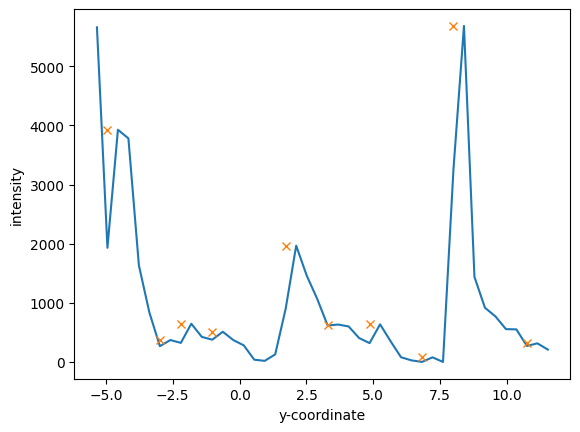

Best parameters: {'eps': 0.85, 'min_samples': 20}, Best score: -2.966763985962429
Point cloud has 45 clusters
Filtered 25148 points from 28342 to 3194
Number of lanes detected: 12 at y-coordinates: [-19.33883799 -16.81565027 -15.55405641 -11.76927482  -9.87688403
  -8.61529016  -6.72289937  -4.83050858  -2.93811779  -1.67652392
  -0.41493006   2.10825766]


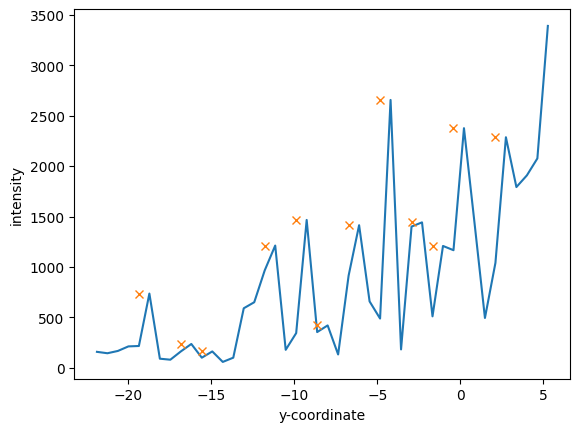

In [26]:
# call the function to load the point clouds
folder_path = './pointclouds/'
pointclouds_with_attributes = load_pointclouds_with_attributes(folder_path)

# create a list of filename which with extensoin .bin
file_name = [os.path.basename(file) for file in os.listdir(folder_path) if file.endswith('.bin')]

for i, (pcd, attributes) in enumerate(pointclouds_with_attributes):
    # filter the point cloud based on the z-axis
    selected_indices = z_filter(pcd)
    pcd.points = o3d.utility.Vector3dVector(np.asarray(pcd.points)[selected_indices])
    attributes = attributes[selected_indices]
    
    
    #  explore the parameter space and visualize the results
    eps_values = np.arange(0.01, 0.9, 0.03)  # Example range for eps
    min_samples_values = range(5, 30, 5)  # Example range for min_samples

    best_score = float('-inf')
    best_params = {'eps': None, 'min_samples': None}

    for eps in eps_values:
        for min_samples in min_samples_values:
            num_clusters, noise_ratio = evaluate_clustering(pcd, eps, min_samples)
            
            # Calculate the clustering score
            current_score = score_clustering(num_clusters, noise_ratio)
            
            # Update best parameters if current score is better
            if current_score > best_score:
                best_score = current_score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

    print(f"Best parameters: {best_params}, Best score: {best_score}")

    eps = best_params['eps']  # Use tuned eps value
    min_samples = best_params['min_samples']  # Use tuned min_samples value
    
    ground_pcd, pcd, ground_attributes, attributes= segment_ground_plane(pcd, attributes, distance_threshold=(eps*0.005), ransac_n=5, num_iterations=1000)
    
    # Perform DBSCAN and update attributes
    updated_pcd, updated_attributes = perform_dbscan_and_update_attributes((pcd, attributes), eps, min_samples)
    # Learn intensity threshold from clusters    
    intensity_threshold = learn_intensity_threshold_from_clusters(updated_attributes, percentage=0.5)
    
    # Filter clusters based on intensity and geometric shape
    selected_indices = filter_clusters_based_on_intensity(updated_attributes, intensity_threshold)
    
    # Extract filtered points for visualization or further processing
    filtered_points = np.asarray(updated_pcd.points)[selected_indices]
    
    # calculate the delta of the points before and after filtering
    delta = len(np.asarray(updated_pcd.points)) - len(filtered_points)
    
    print(f"Filtered {delta} points from {len(np.asarray(updated_pcd.points))} to {len(filtered_points)}")
    
    # Create a new point cloud object for filtered points, if needed
    filtered_pcd = o3d.geometry.PointCloud()
    filtered_pcd.points = o3d.utility.Vector3dVector(filtered_points)
    filtered_attributes = updated_attributes[selected_indices]

    # visualize_lane_detection(pcd, filtered_pcd)

    # Replace the original pcd and attributes with the filtered ones
    pointclouds_with_attributes[i] = (filtered_pcd, filtered_attributes)
    num_lanes, y_peaks_coordinates = find_number_of_lanes(np.asarray(filtered_pcd.points), np.asarray(filtered_attributes), percentile = 10, min_num_peaks=2)
    lane_groups = segregate_points_based_on_lanes(filtered_pcd, filtered_attributes, y_peaks_coordinates, threshold_intensity=0.5, num_bins=50)
    visualize_lane_groups_by_lane_number(filtered_pcd, lane_groups)


    
    # # conver pointcloud to np.array
    # filtered_pcd_array = np.asarray(filtered_pcd.points)
    # min_x = np.floor(np.min(filtered_pcd_array[:, 0])).astype(int)
    # max_x = np.ceil(np.max(filtered_pcd_array[:, 0])).astype(int) 
    
    # grid_dict = create_grid_dict(min_x, max_x)
    # data_in_grid = filter_lidar_data_by_grid(filtered_pcd_array, grid_dict)
    
    # poly_degree = 3
    # # shape of lidar_data
    # n = filtered_pcd_array.shape[1]
    
    # data_repres_left = np.empty((0, n))
    # data_repres_right = np.empty((0, n)) 

    # iteration = 0
    # max_iter = 1000
    # prev_error = 1000

    # start = time.time()
    # while iteration <= max_iter:
    #     for y in (-1, 1):
    #         for x in range(min_x, max_x + 1):
    #             if y == -1:
    #                 if len(data_in_grid[y, x]) >= min_samples:
    #                     idx = np.random.randint(len(data_in_grid[y, x]), size = poly_degree)
    #                     data_repres_left = np.append(data_repres_left, data_in_grid[y, x][idx, :], axis = 0)
    #                 elif len(data_in_grid[y, x]) == 0:
    #                     pass
    #                 else:
    #                     idx = np.random.randint(len(data_in_grid[y, x]), size = len(data_in_grid[y,x]))
    #                     data_repres_left = np.append(data_repres_left, data_in_grid[y, x][idx, :], axis = 0)

    #             elif y == 1:
    #                 if len(data_in_grid[y, x]) >= min_samples:
    #                     idx = np.random.randint(len(data_in_grid[y, x]), size = poly_degree)
    #                     data_repres_right = np.append(data_repres_right, data_in_grid[y, x][idx, :], axis = 0)
    #                 elif len(data_in_grid[y, x]) == 0:
    #                     pass
    #                 else:
    #                     idx = np.random.randint(len(data_in_grid[y, x]), size = len(data_in_grid[y,x]))
    #                     data_repres_right = np.append(data_repres_right, data_in_grid[y, x][idx, :], axis = 0)
                        
    #     left_grids_x = np.sort(data_repres_left, axis = 0)[:, 0] 
    #     left_grids_y = np.sort(data_repres_left, axis = 0)[:, 1]
    #     right_grids_x = np.sort(data_repres_right, axis = 0)[:, 0] 
    #     right_grids_y = np.sort(data_repres_right, axis = 0)[:, 1]

    #     ransac_up = RANSACRegressor(PolynomialRegression(degree = poly_degree),
    #                             min_samples = int(min_samples*0.6),    
    #                             max_trials = 10000,
    #                             random_state=0)
    #     ransac_up.fit(np.expand_dims(left_grids_x, axis=1), left_grids_y)
    #     left_grids_y_pred = ransac_up.predict(np.expand_dims(left_grids_x, axis=1))
    #     left_lane_coeffs= ransac_up.estimator_.get_params(deep = True)["coeffs"]

    #     ransac_down = RANSACRegressor(PolynomialRegression(degree = poly_degree), 
    #                             min_samples = int(min_samples*0.6),    
    #                             max_trials = 10000,
    #                             random_state=0)
    #     ransac_down.fit(np.expand_dims(right_grids_x, axis=1), right_grids_y)
    #     right_grids_y_pred = ransac_down.predict(np.expand_dims(right_grids_x, axis=1))
    #     right_lane_coeffs = ransac_down.estimator_.get_params(deep = True)["coeffs"]
        
    #     ego_lane_coeffs_pair = np.append(right_lane_coeffs, left_lane_coeffs, axis = 0) 
    #     curr_error = cost(left_lane_coeffs, right_lane_coeffs, np.linspace(min_x, max_x, num=100))      
        
    #     if curr_error < prev_error:
    #         prev_error = curr_error 
    #         best_coeffs_pair = ego_lane_coeffs_pair

    #     iteration += 1

    # print("time spent: {:.2f} sec".format(time.time() - start)) 
    # print(prev_error)

    # # Convert the best_coeffs_pair to a 2D array with 4 columns
    # best_coeffs_pair = best_coeffs_pair.reshape(-1, 4)
    # # Ensure the output directory exists
    # output_dir = 'sample_output'
    # if not os.path.exists(output_dir):
    #     os.makedirs(output_dir)
    # # Save the coefficients to a text file
    # lidar_txt_name = file_name[i].replace('.bin', '.txt')
    # # save both left and right lane coefficients as two rows in the text file
    # np.savetxt(os.path.join(output_dir, lidar_txt_name), best_coeffs_pair, delimiter=';', fmt='%.15e')        
    
    # fh = open(f'scene{i}', 'bw')
    # # save the point cloud to file as float32
    # np.asarray(filtered_pcd.points).astype('float32').tofile(fh)
    